In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Manisha\\Project6\\train.csv')
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
train_data.shape

(159571, 8)

In [4]:
train_data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [5]:
train_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
train_data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

                                                  test data

In [7]:
test_data=pd.read_excel('C:\\Users\\Dell\\Desktop\\test.xlsx')
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
test_data.shape

(153164, 2)

# Data Cleaning

In [10]:
train_data['comment_text']=train_data['comment_text'].str.lower()

train_data['comment_text']=train_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

train_data['comment_text'] = train_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

train_data['comment_text'] = train_data['comment_text'].str.replace(r'£|\$', 'dollers')

train_data['comment_text'] = train_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

In [11]:
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [12]:
train_data['Comment_length'] = train_data['comment_text'].str.len()

In [13]:
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,265
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,126
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


# Data Visualization

0    144277
1     15294
Name: malignant, dtype: int64


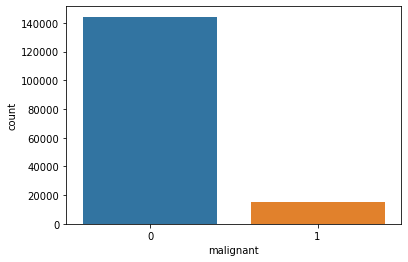

In [14]:
ax= sns.countplot(x='malignant',data=train_data)
print(train_data['malignant'].value_counts())

0    157976
1      1595
Name: highly_malignant, dtype: int64


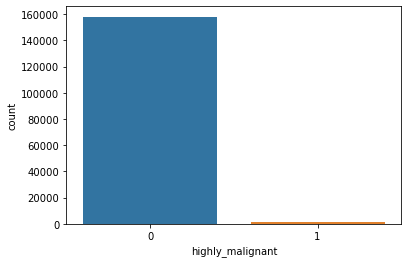

In [15]:
ax= sns.countplot(x='highly_malignant',data=train_data)
print(train_data['highly_malignant'].value_counts())

0    151122
1      8449
Name: rude, dtype: int64


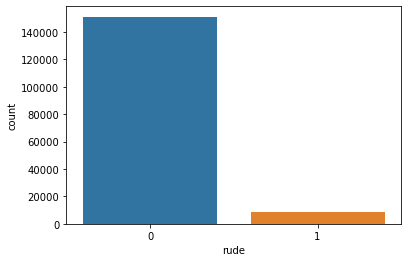

In [16]:
ax= sns.countplot(x='rude',data=train_data)
print(train_data['rude'].value_counts())

0    159093
1       478
Name: threat, dtype: int64


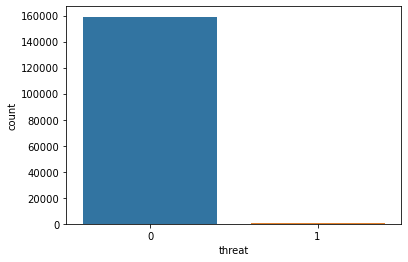

In [17]:
ax= sns.countplot(x='threat',data=train_data)
print(train_data['threat'].value_counts())

0    151694
1      7877
Name: abuse, dtype: int64


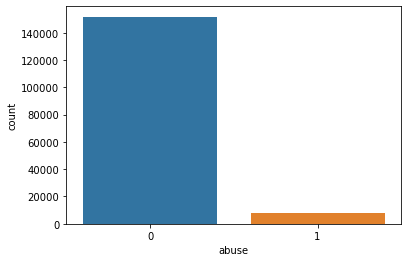

In [18]:
ax= sns.countplot(x='abuse',data=train_data)
print(train_data['abuse'].value_counts())

0    158166
1      1405
Name: loathe, dtype: int64


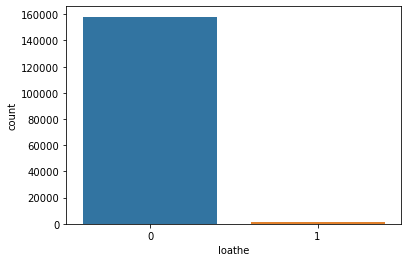

In [19]:
ax= sns.countplot(x='loathe',data=train_data)
print(train_data['loathe'].value_counts())

<AxesSubplot:xlabel='Comment_length', ylabel='Density'>

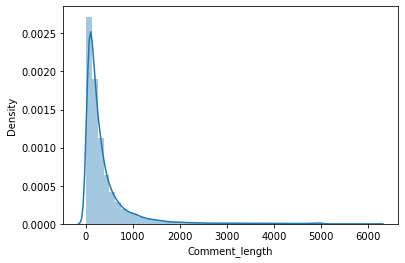

In [22]:
sns.distplot(train_data['Comment_length'])

                                        Encoding Technique

In [23]:
enc=OrdinalEncoder()

for i in train_data.columns:
    if train_data[i].dtypes=="object":
        train_data[i]=enc.fit_transform(train_data[i].values.reshape(-1,1))

In [24]:
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,0.0,74154.0,0,0,0,0,0,0,265
1,1.0,69202.0,0,0,0,0,0,0,126
2,2.0,81963.0,0,0,0,0,0,0,233
3,4.0,35592.0,0,0,0,0,0,0,622
4,5.0,157295.0,0,0,0,0,0,0,67


# Analysis

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159571 non-null  float64
 1   comment_text      159571 non-null  float64
 2   malignant         159571 non-null  int64  
 3   highly_malignant  159571 non-null  int64  
 4   rude              159571 non-null  int64  
 5   threat            159571 non-null  int64  
 6   abuse             159571 non-null  int64  
 7   loathe            159571 non-null  int64  
 8   Comment_length    159571 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 MB


In [26]:
train_data.describe()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
count,159571.00000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,79785.00000,79673.449349,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,397.305394
std,46064.32424,45971.260593,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,596.176898
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,39892.50000,39864.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000
50%,79785.00000,79705.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000
75%,119677.50000,119438.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,439.000000
max,159570.00000,159281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6146.000000


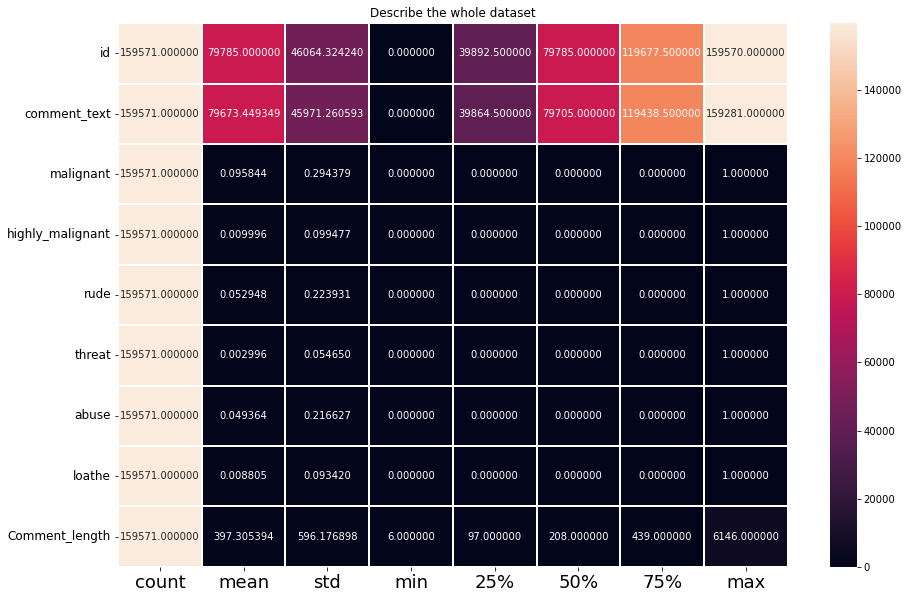

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                           Correlation

In [28]:
train_data.corr()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
id,1.000000,0.002902,-0.003263,-0.001403,-0.002188,-0.001165,-0.002086,-0.000844,-0.000868
comment_text,0.002902,1.000000,0.103346,0.039891,0.074999,0.020648,0.087012,0.034788,-0.253813
malignant,-0.003263,0.103346,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.055007
highly_malignant,-0.001403,0.039891,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.009511
rude,-0.002188,0.074999,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.043351
threat,-0.001165,0.020648,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007927
abuse,-0.002086,0.087012,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045465
loathe,-0.000844,0.034788,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.014096
Comment_length,-0.000868,-0.253813,-0.055007,0.009511,-0.043351,-0.007927,-0.045465,-0.014096,1.000000


<AxesSubplot:>

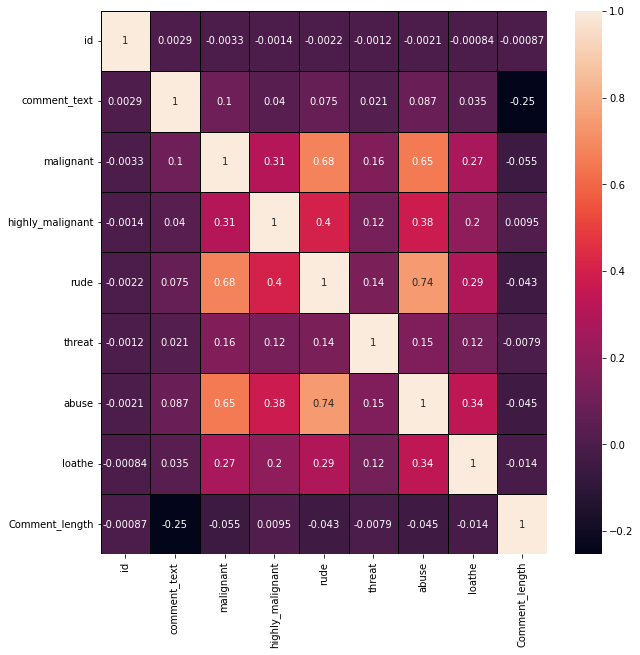

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True,linewidth=0.5,linecolor='black')

In [30]:
train_data.skew()

id                  7.386055e-17
comment_text       -1.455043e-03
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
Comment_length      4.138234e+00
dtype: float64

In [34]:
target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

target_data = train_data[target]

train_data['Result'] =train_data[target].sum(axis =1)
print(train_data['Result'].value_counts())
train_data['Result'] = train_data['Result'] > 0 
train_data['Result'] = train_data['Result'].astype(int)
print(train_data['Result'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Result, dtype: int64
0    143346
1     16225
Name: Result, dtype: int64


In [37]:
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,Result
0,0.0,74154.0,0,0,0,0,0,0,265,0
1,1.0,69202.0,0,0,0,0,0,0,126,0
2,2.0,81963.0,0,0,0,0,0,0,233,0
3,4.0,35592.0,0,0,0,0,0,0,622,0
4,5.0,157295.0,0,0,0,0,0,0,67,0


In [39]:
train_data=train_data.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'],axis=1)
train_data.head()

,id,comment_text,Comment_length,Result
0,0.0,74154.0,265,0
1,1.0,69202.0,126,0
2,2.0,81963.0,233,0
3,4.0,35592.0,622,0
4,5.0,157295.0,67,0


# Model Testing

In [40]:
x=train_data.drop(['Result'],axis=1)
y=train_data['Result']

                                            Logistic Regression

In [41]:
lr=LogisticRegression()

In [42]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 89.85040152552844
Testing accuracy score: 89.7894385026738


random state 1
Training accuracy score: 89.92291784169957
Testing accuracy score: 89.62023729946524


random state 2
Training accuracy score: 89.85308731501624
Testing accuracy score: 89.78317179144385


random state 3
Training accuracy score: 89.7519225776417
Testing accuracy score: 90.0192179144385


random state 4
Training accuracy score: 89.86830678878056
Testing accuracy score: 89.74766042780749


random state 5
Training accuracy score: 89.81011468321113
Testing accuracy score: 89.88343917112299


random state 6
Training accuracy score: 89.86651626245535
Testing accuracy score: 89.75183823529412


random state 7
Training accuracy score: 89.82801994646327
Testing accuracy score: 89.84166109625669


random state 8
Training accuracy score: 89.87188784143099
Testing accuracy score: 89.73930481283422


random state 9
Training accuracy score: 89.8602494203171
Testing accuracy score: 89.7

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=43) 

In [44]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 89.82912767379679


In [45]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[43003     0]
 [ 4869     0]]


In [46]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     43003
           1       0.00      0.00      0.00      4869

    accuracy                           0.90     47872
   macro avg       0.45      0.50      0.47     47872
weighted avg       0.81      0.90      0.85     47872



                                      K Neighbors Classifier

In [47]:
knn= KNeighborsClassifier()

In [48]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 90.60868942425626
Testing accuracy score: 89.07085561497327


random state 1
Training accuracy score: 90.77878942515152
Testing accuracy score: 88.77632018716578


random state 2
Training accuracy score: 90.65613837187442
Testing accuracy score: 88.9141878342246


random state 3
Training accuracy score: 90.59705100314237
Testing accuracy score: 89.25259024064172


random state 4
Training accuracy score: 90.61406100323191
Testing accuracy score: 88.96641042780749


random state 5
Training accuracy score: 90.55855468715028
Testing accuracy score: 89.19201203208557


random state 6
Training accuracy score: 90.68568205624044
Testing accuracy score: 88.97476604278076


random state 7
Training accuracy score: 90.64539521392312
Testing accuracy score: 89.05205548128342


random state 8
Training accuracy score: 90.67583416145176
Testing accuracy score: 88.93716577540107


random state 9
Training accuracy score: 90.71074942479342
Testing accuracy score: 8

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=19) 

In [50]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 89.29436831550802


In [51]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[42398   684]
 [ 4441   349]]


In [52]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     43082
           1       0.34      0.07      0.12      4790

    accuracy                           0.89     47872
   macro avg       0.62      0.53      0.53     47872
weighted avg       0.85      0.89      0.86     47872



                                       Decision Tree classifier

In [53]:
clf=DecisionTreeClassifier()

In [54]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 84.57135695187165


random state 1
Training accuracy score: 100.0
Testing accuracy score: 84.54002339572193


random state 2
Training accuracy score: 100.0
Testing accuracy score: 84.39797794117648


random state 3
Training accuracy score: 100.0
Testing accuracy score: 84.3206885026738


random state 4
Training accuracy score: 100.0
Testing accuracy score: 84.42722259358288


random state 5
Training accuracy score: 100.0
Testing accuracy score: 84.3478442513369


random state 6
Training accuracy score: 100.0
Testing accuracy score: 84.6716243315508


random state 7
Training accuracy score: 100.0
Testing accuracy score: 84.51704545454545


random state 8
Training accuracy score: 100.0
Testing accuracy score: 84.24339906417111


random state 9
Training accuracy score: 100.0
Testing accuracy score: 84.24339906417111


random state 10
Training accuracy score: 100.0
Testing accuracy score: 84.5504679144385


random state 

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=35) 

In [56]:
clf.fit(x_train,y_train)
y_pred3 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 84.70295788770053


In [58]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[39275  3705]
 [ 3618  1274]]


In [59]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     42980
           1       0.26      0.26      0.26      4892

    accuracy                           0.85     47872
   macro avg       0.59      0.59      0.59     47872
weighted avg       0.85      0.85      0.85     47872



                                   Random Forest Classifier

In [60]:
rfc=RandomForestClassifier()

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 99.99283789469915
Testing accuracy score: 90.01504010695187


random state 1
Training accuracy score: 99.99731421051217
Testing accuracy score: 89.83957219251337


random state 2
Training accuracy score: 99.99731421051217
Testing accuracy score: 90.09859625668449


random state 3
Training accuracy score: 99.99462842102436
Testing accuracy score: 90.26361965240642


random state 4
Training accuracy score: 99.99104736837393
Testing accuracy score: 90.00877339572193


random state 5
Training accuracy score: 99.99194263153655
Testing accuracy score: 90.19677473262033


random state 6
Training accuracy score: 99.99373315786175
Testing accuracy score: 90.07770721925134


random state 7
Training accuracy score: 99.99373315786175
Testing accuracy score: 90.06099598930481


random state 8
Training accuracy score: 99.99373315786175
Testing accuracy score: 89.94610628342245


random state 9
Training accuracy score: 99.99283789469915
Testing accuracy score: 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=84)

In [63]:
rfc.fit(x_train,y_train)
y_pred4 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 90.2615307486631


In [65]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[42787   301]
 [ 4361   423]]


In [66]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     43088
           1       0.58      0.09      0.15      4784

    accuracy                           0.90     47872
   macro avg       0.75      0.54      0.55     47872
weighted avg       0.88      0.90      0.87     47872



The target variable is not balanced so in replace of accuracy score we consider recall and precision score for testing better 
score and predict the better model for this model.  

precision and recall are better of all the models but the RANDOM FOREST CLASSIFIER is the better in all of them.

                                          Conclusion of test_data

In [68]:
import joblib

joblib.dump(y_pred4,"Malignant_Comments_Classifier.pkl")

['Malignant_Comments_Classifier.pkl']

In [73]:
test_pred=pd.DataFrame({"Predicted data":y_pred4})
test_pred

,Predicted data
0,0
1,0
2,0
3,0
4,0
...,...
47867,0
47868,0
47869,0
47870,0


In [74]:
test_pred.to_csv('C:\\Users\\Dell\\Desktop\\Manisha\\Project6\\test_pred.csv',index=False)